Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

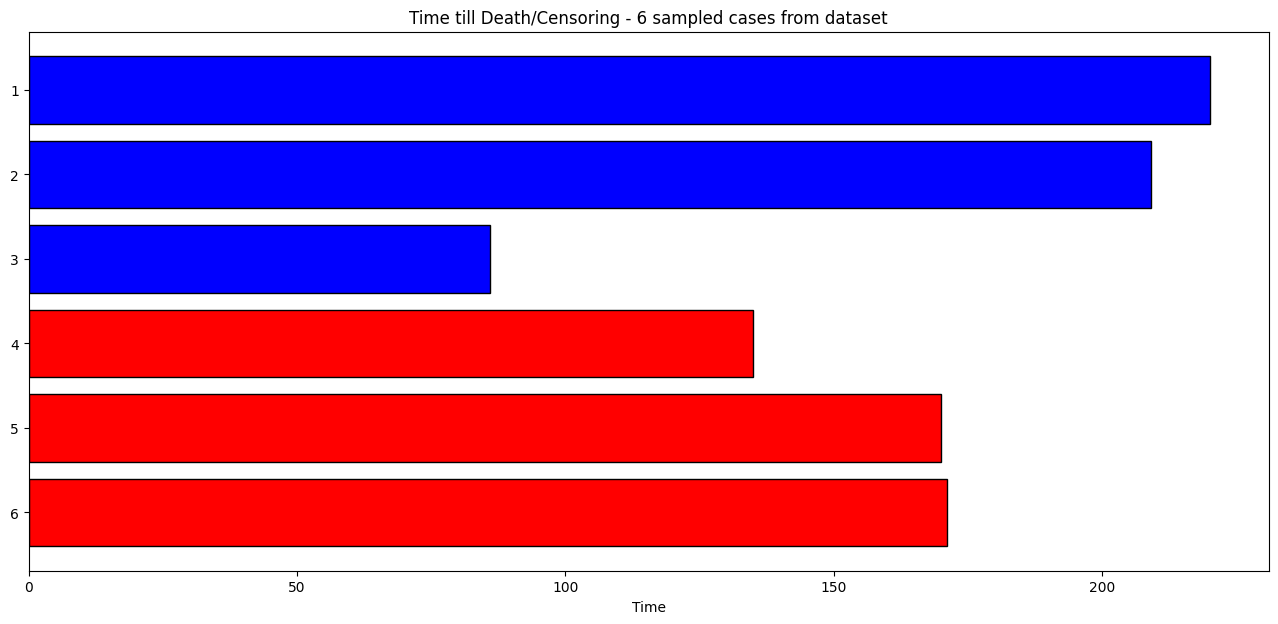

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from a CSV file into a DataFrame
all_df = pd.read_csv(
    '/Users/saqlainnaseemkalokhe/Desktop/Honors/heart_failure_clinical_records_dataset.csv')

# Sample 3 + 3 points from death/censored groups, and plot them for comparison
plot_censoring = all_df.groupby('DEATH_EVENT').apply(
    lambda group: group.sample(n=3)).reset_index(drop=True)

# Create a bar plot to visualize the sampled data
plt.figure(figsize=(16, 7))
colors = np.where(plot_censoring['DEATH_EVENT'] == 1, 'red', 'blue')
plt.barh(range(len(plot_censoring)),
         plot_censoring['time'], color=colors, edgecolor='black')
plt.yticks(range(len(plot_censoring)), plot_censoring.index + 1)
plt.xlabel('Time')
plt.title('Time till Death/Censoring - 6 sampled cases from dataset')
plt.gca().invert_yaxis()
plt.show()


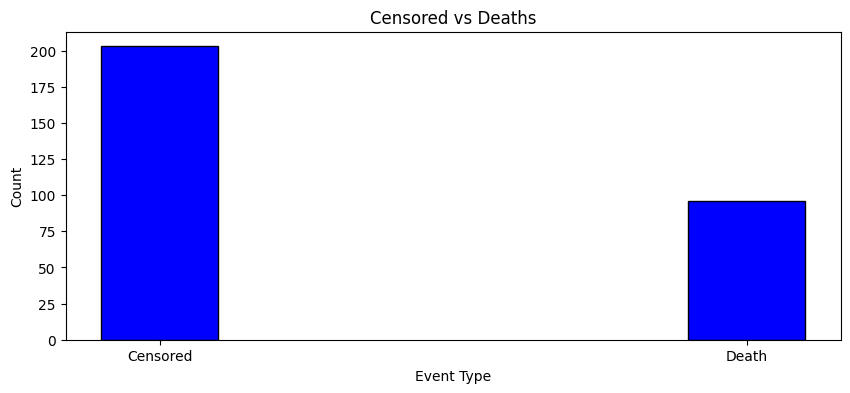

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have 'all_df' DataFrame with 'DEATH_EVENT' column

# Calculate counts of "censored" and "death" events
event_counts = all_df['DEATH_EVENT'].value_counts().reset_index()
event_counts.columns = ['event_type', 'count']

# Create a bar plot to visualize the counts
plt.figure(figsize=(10, 4))
plt.bar(event_counts['event_type'], event_counts['count'],
        color='blue', edgecolor='black', width=0.2)
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Censored vs Deaths')
plt.xticks(event_counts['event_type'], ['Censored', 'Death'])
plt.show()


In [5]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://files.pythonhosted.org/packages/98/a7/3883b2bd4e5cff02bdb578eadf09910581220660257183145b6d2253e018/matplotlib-3.8.0-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
Note: you may need to restart the kernel to use updated packages.


/var/folders/qf/6mt97k2d3jd2krc6_myrdg_w0000gn/T/ipykernel_1697/442952879.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(censored_data, color='blue', label='Censored', shade=True)
/var/folders/qf/6mt97k2d3jd2krc6_myrdg_w0000gn/T/ipykernel_1697/442952879.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(death_data, color='red', label='Death', shade=True)


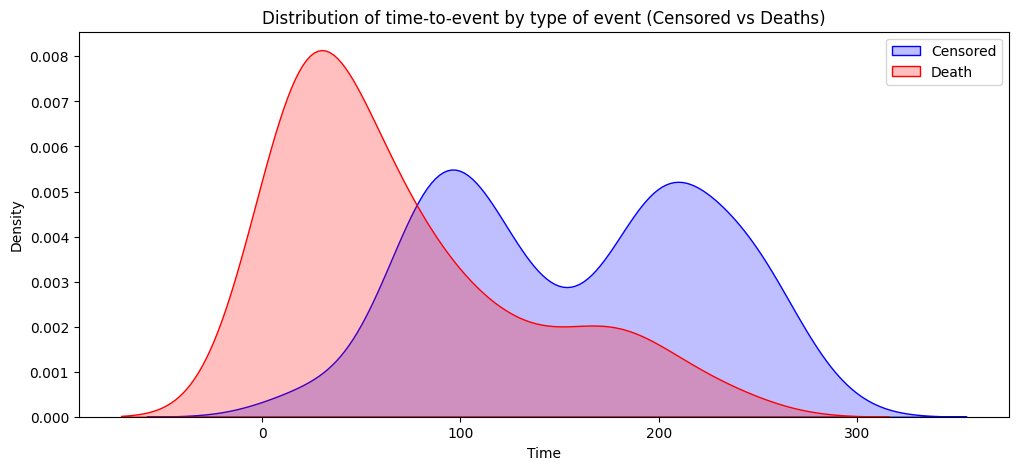

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have 'all_df' DataFrame with 'DEATH_EVENT' and 'time' columns

# Create a figure and axis
plt.figure(figsize=(12, 5))

# Filter data for censored and death events
censored_data = all_df[all_df['DEATH_EVENT'] == 0]['time']
death_data = all_df[all_df['DEATH_EVENT'] == 1]['time']

# Create density plots for censored and death events
sns.kdeplot(censored_data, color='blue', label='Censored', shade=True)
sns.kdeplot(death_data, color='red', label='Death', shade=True)

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Distribution of time-to-event by type of event (Censored vs Deaths)')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [7]:
pip install lifelines


  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/cc/95/35190b276a598b640e04e96bcee19362884835c01994db7323d443017e60/lifelines-0.27.8-py3-none-any.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/ea/61/46ede8e8efe9064d1bb3993feb3e18474b16327c170a9d1e5d29bb490b3e/formulaic-0.6.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 6.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/

In [8]:
import pandas as pd
from lifelines import KaplanMeierFitter

# Assuming you already have 'all_df' DataFrame with 'DEATH_EVENT' and 'time' columns

# Create Kaplan-Meier survival analysis model
kmf = KaplanMeierFitter()

# Fit the model using the survival time and event indicator
kmf.fit(all_df['time'], event_observed=all_df['DEATH_EVENT'])

# Define the specific time points for summarizing survival estimates
times = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 290]

# Generate Kaplan-Meier survival estimates and summary
survival_estimates = kmf.survival_function_at_times(times)
summary = pd.DataFrame(
    {'Time': times, 'Survival Probability': survival_estimates.values})

# Print the summary
print(summary)


    Time  Survival Probability
0      0              1.000000
1     30              0.882280
2     60              0.817242
3     90              0.762680
4    120              0.730455
5    150              0.702923
6    180              0.654293
7    210              0.621921
8    240              0.593695
9    270              0.575705
10   290              0.575705


/var/folders/qf/6mt97k2d3jd2krc6_myrdg_w0000gn/T/ipykernel_1697/3750859756.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust subplot spacing


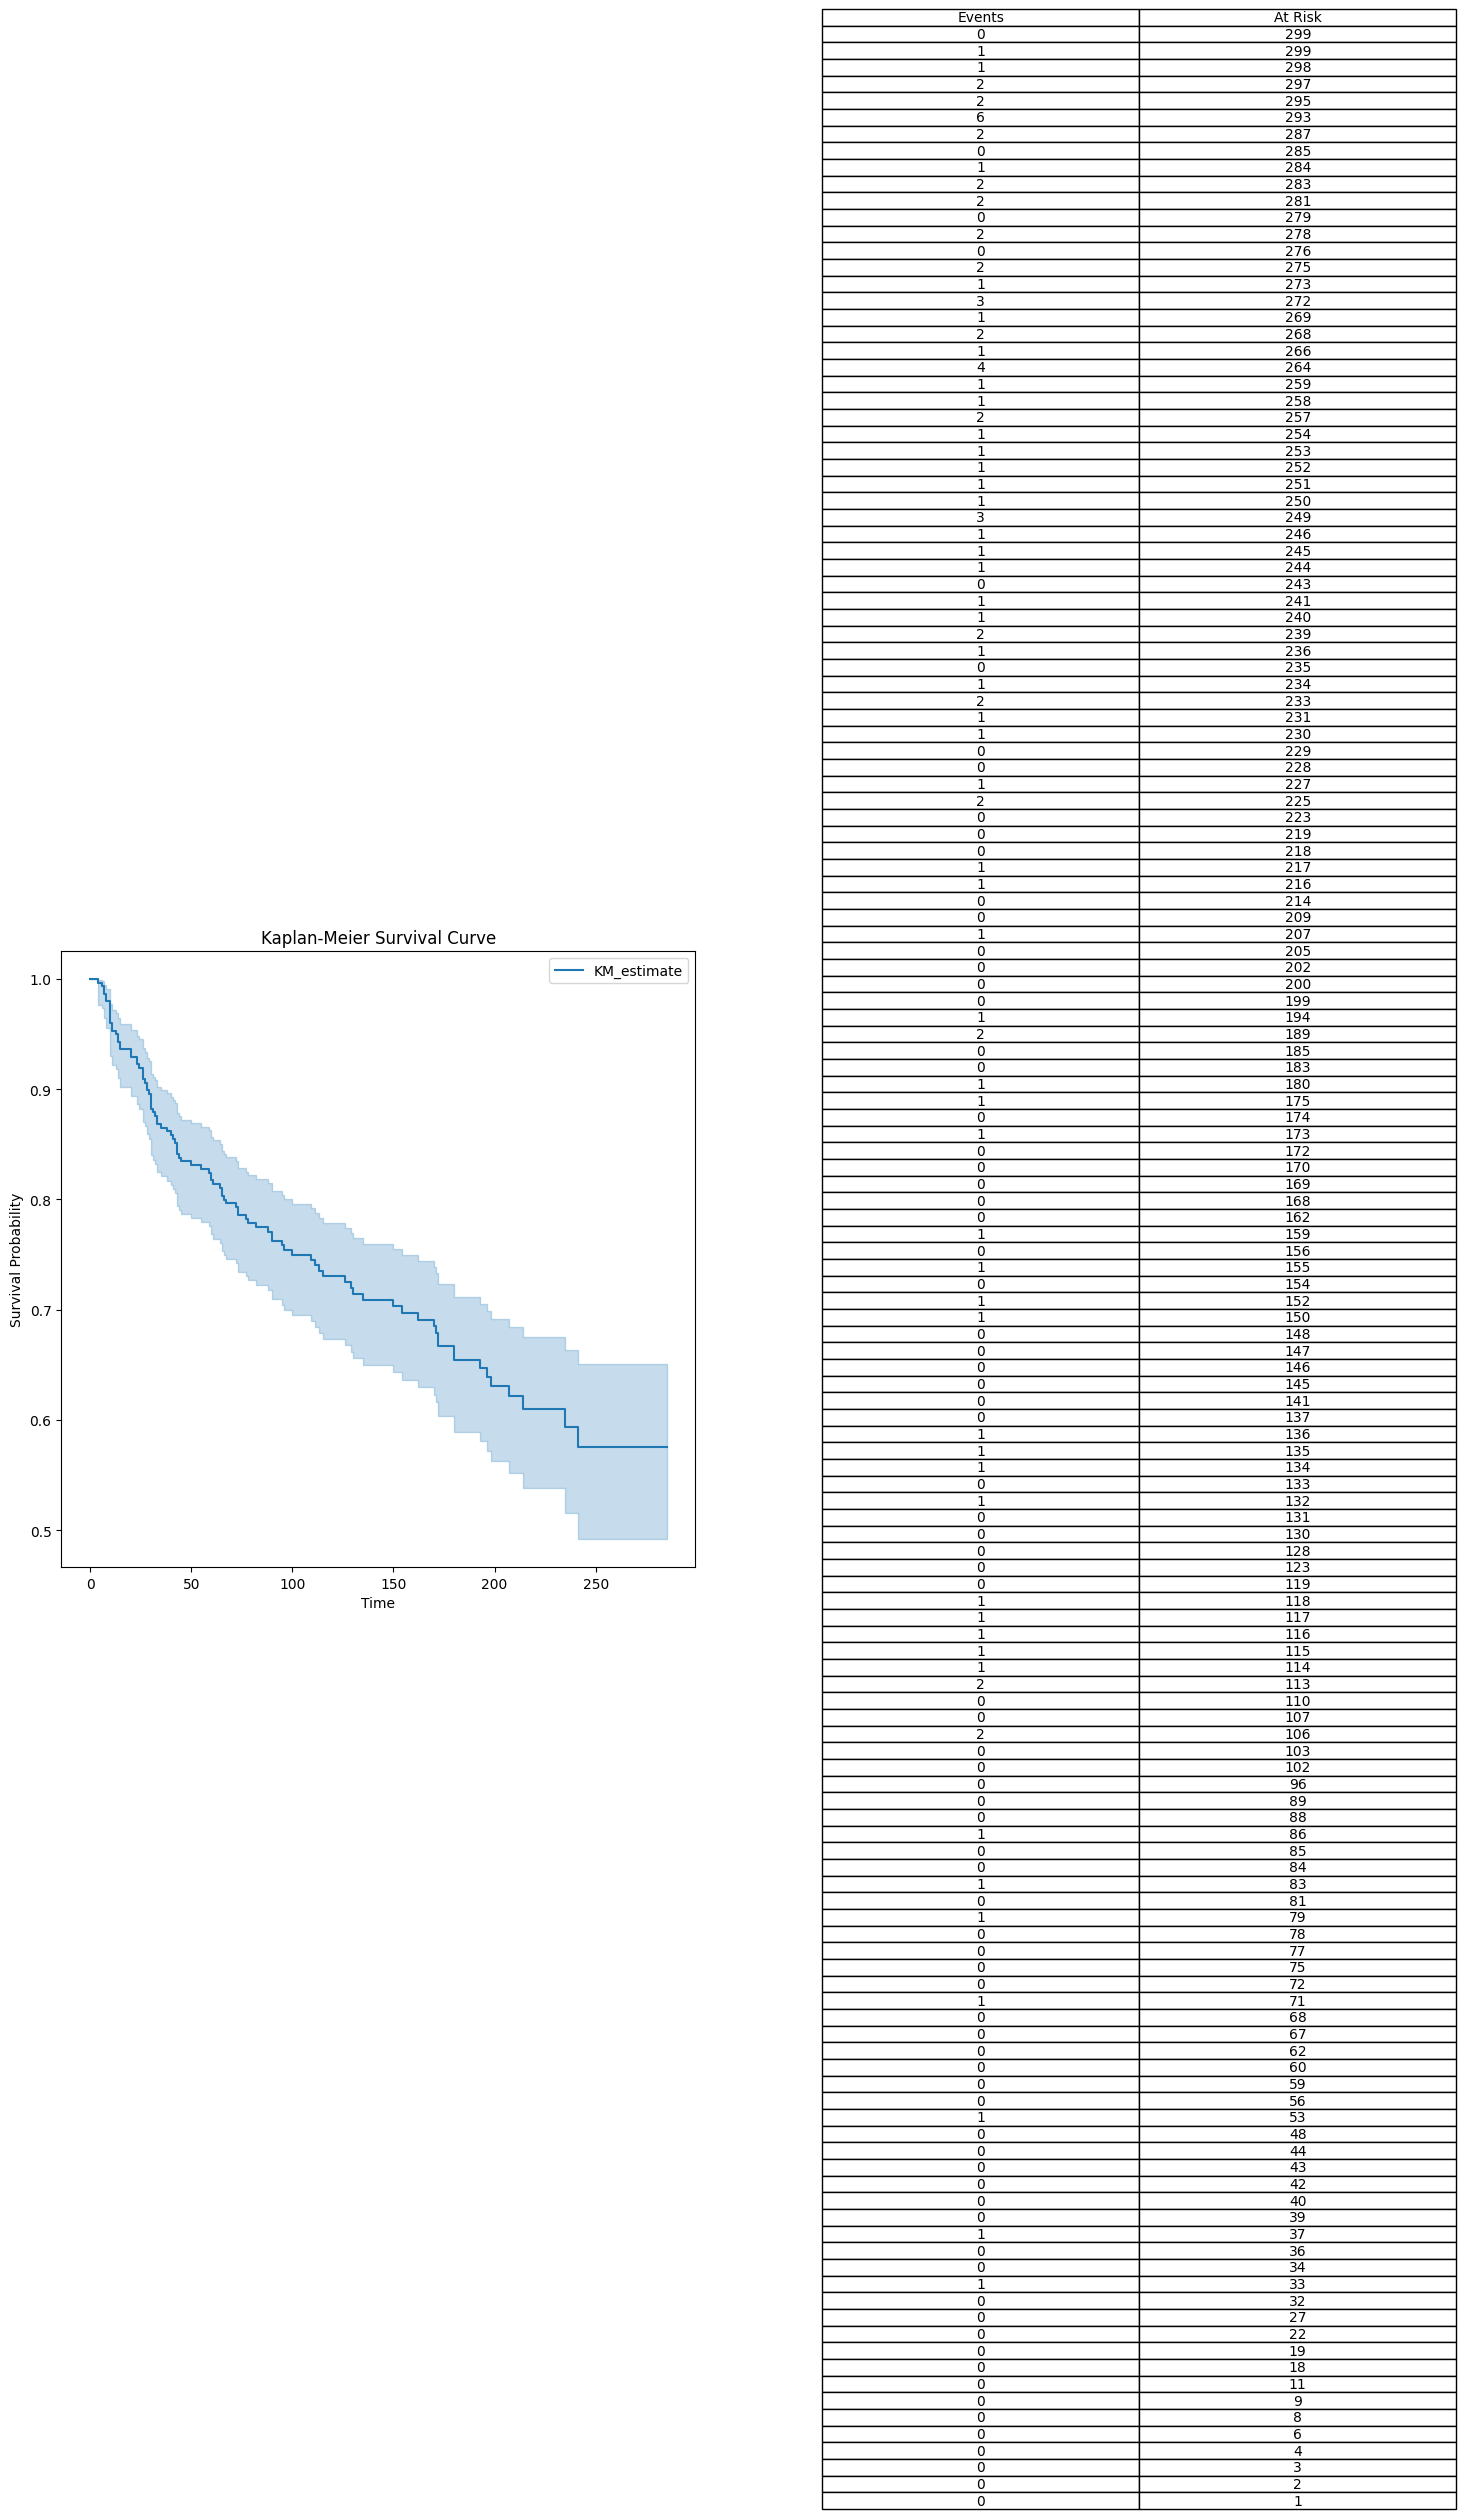

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming you already have 'all_df' DataFrame with 'DEATH_EVENT' and 'time' columns

# Create Kaplan-Meier survival analysis model
kmf = KaplanMeierFitter()

# Fit the model using the survival time and event indicator
kmf.fit(all_df['time'], event_observed=all_df['DEATH_EVENT'])

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the Kaplan-Meier survival curve
kmf.plot(ax=ax1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Survival Probability')
ax1.set_title('Kaplan-Meier Survival Curve')

# Add a risk table
table = kmf.event_table
table['at_risk'] = table['at_risk'].astype(int)
table = table[['observed', 'at_risk']]
table.columns = ['Events', 'At Risk']
ax2.axis('off')  # Turn off the second subplot's axis
ax2.table(cellText=table.values, colLabels=table.columns,
          loc='center', cellLoc='center', colLoc='center', fontsize=12)

plt.tight_layout()  # Adjust subplot spacing

plt.show()


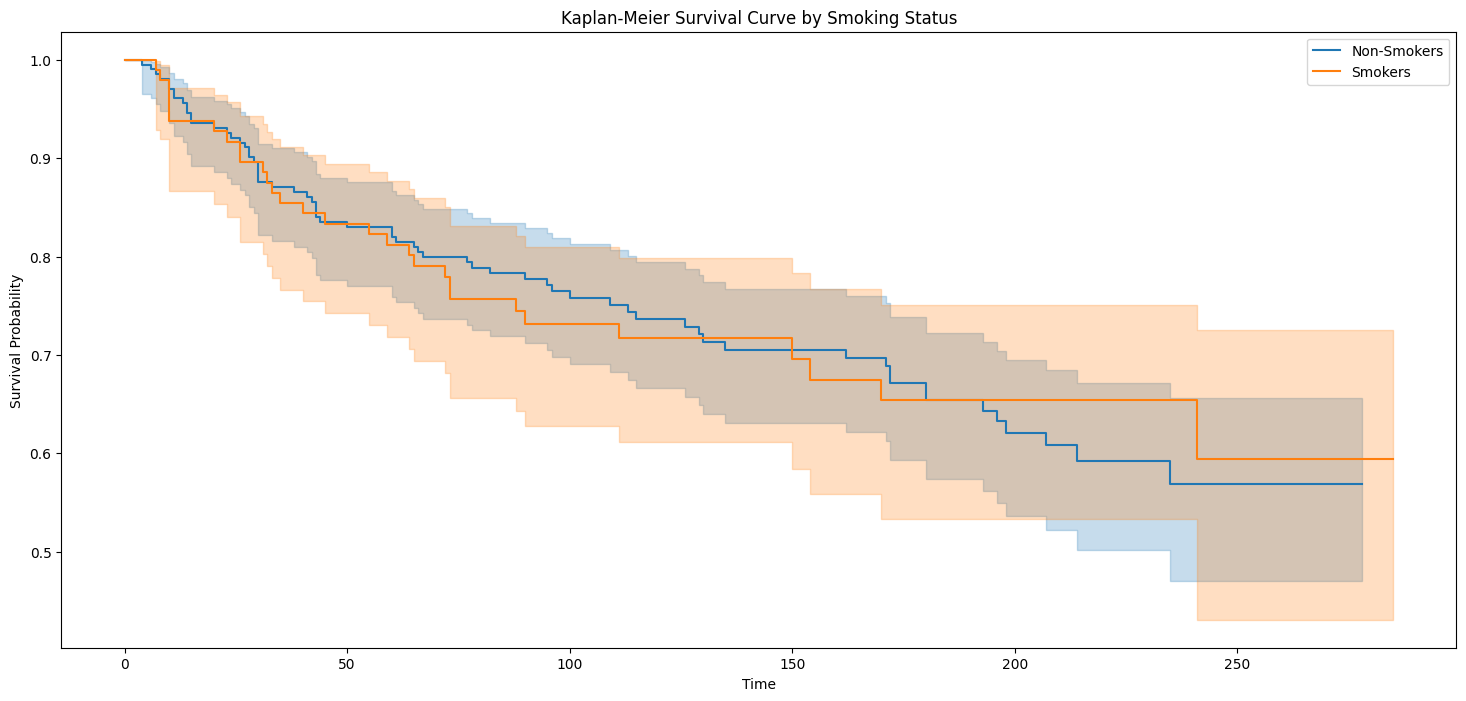

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Assuming you already have 'all_df' DataFrame with 'DEATH_EVENT', 'time', and 'smoking' columns

# Create Kaplan-Meier survival analysis model based on smoking status
kmf = KaplanMeierFitter()

# Fit the model for non-smokers
non_smokers = all_df[all_df['smoking'] == 0]
kmf.fit(non_smokers['time'],
        event_observed=non_smokers['DEATH_EVENT'], label='Non-Smokers')

# Create a figure and axis
plt.figure(figsize=(18, 8))

# Plot the Kaplan-Meier survival curve for non-smokers
kmf.plot(label='Non-Smokers')

# Fit the model for smokers
smokers = all_df[all_df['smoking'] == 1]
kmf.fit(smokers['time'],
        event_observed=smokers['DEATH_EVENT'], label='Smokers')

# Plot the Kaplan-Meier survival curve for smokers
kmf.plot(label='Smokers')

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve by Smoking Status')
plt.legend()

plt.show()


In [15]:
import pandas as pd

# Assuming you already have 'all_df' DataFrame with the relevant columns

# Change columns into factors
all_df['anaemia'] = all_df['anaemia'].apply(
    lambda x: "anaemic" if x == 1 else "non-anaemic")
all_df['diabetes'] = all_df['diabetes'].apply(
    lambda x: "diabetic" if x == 1 else "non-diabetic")
all_df['high_blood_pressure'] = all_df['high_blood_pressure'].apply(
    lambda x: "high-bp" if x == 1 else "non-high-bp")
all_df['sex'] = all_df['sex'].apply(lambda x: "female" if x == 0 else "male")
all_df['smoking'] = all_df['smoking'].apply(
    lambda x: "non-smoker" if x == 0 else "smoker")

# Scale columns (divide by appropriate factors)
all_df['platelets'] /= 1e4
all_df['creatinine_phosphokinase'] /= 1e3

# If you want to explicitly specify the factor levels, you can use the `pd.Categorical` constructor
all_df['anaemia'] = pd.Categorical(all_df['anaemia'], categories=[
                                   'non-anaemic', 'anaemic'], ordered=True)
all_df['diabetes'] = pd.Categorical(all_df['diabetes'], categories=[
                                    'non-diabetic', 'diabetic'], ordered=True)
all_df['high_blood_pressure'] = pd.Categorical(
    all_df['high_blood_pressure'], categories=['non-high-bp', 'high-bp'], ordered=True)
all_df['sex'] = pd.Categorical(all_df['sex'], categories=[
                               'female', 'male'], ordered=True)
all_df['smoking'] = pd.Categorical(all_df['smoking'], categories=[
                                   'non-smoker', 'smoker'], ordered=True)


In [16]:

print(all_df.head())


    age      anaemia  creatinine_phosphokinase      diabetes  \
0  75.0  non-anaemic                     0.582  non-diabetic   
1  55.0  non-anaemic                     7.861  non-diabetic   
2  65.0  non-anaemic                     0.146  non-diabetic   
3  50.0      anaemic                     0.111  non-diabetic   
4  65.0      anaemic                     0.160      diabetic   

   ejection_fraction high_blood_pressure  platelets  serum_creatinine  \
0                 20             high-bp  26.500000               1.9   
1                 38         non-high-bp  26.335803               1.1   
2                 20         non-high-bp  16.200000               1.3   
3                 20         non-high-bp  21.000000               1.9   
4                 20         non-high-bp  32.700000               2.7   

   serum_sodium     sex     smoking  time  DEATH_EVENT  
0           130    male  non-smoker     4            1  
1           136    male  non-smoker     6            1  
2    